In [1]:
!pwd

/home/mila/g/gagnonju/IteratedDecoding/jobs


In [2]:
import json
import os
from pathlib import Path
import re
import sys


import compute_rouge
import plot_rouges


from IPython.utils import io
import rich
from rich.panel import Panel


def json_load(path):
    with open(path) as fin:
        return json.load(fin)

ROOT = "/home/mila/g/gagnonju/IteratedDecoding/"
target = f"{ROOT}/GAR/gar/outputs/sentence_with_context"
target_dir = f"{ROOT}/GAR/gar/outputs/"

In [3]:
!ls *py -1 

common_retriever.py
compute_rouge.py
plot_rouges.py
start_ngrok_and_jupyter.py


In [4]:
print(target)
print("")
!du -h "$target_dir" | sort -h
print("")
!ls --color --group-directories-first -1 -X "$target"
print("")
!ls --color --group-directories-first -1 -X 

/home/mila/g/gagnonju/IteratedDecoding//GAR/gar/outputs/sentence_with_context

8.4G	/home/mila/g/gagnonju/IteratedDecoding//GAR/gar/outputs/answer_with_context
9.1G	/home/mila/g/gagnonju/IteratedDecoding//GAR/gar/outputs/data_without_context
12G	/home/mila/g/gagnonju/IteratedDecoding//GAR/gar/outputs/sentence_with_context
29G	/home/mila/g/gagnonju/IteratedDecoding//GAR/gar/outputs/

last.ckpt
checkpoint_params.json
real_args.json
train_params.json
valall-0.json
valall-100.json
valall-101.json
valall-102.json
valall-103.json
valall-104.json
valall-105.json
valall-106.json
valall-107.json
valall-108.json
valall-109.json
valall-10.json
valall-110.json
valall-111.json
valall-112.json
valall-113.json
valall-11.json
valall-12.json
valall-13.json
valall-14.json
valall-15.json
valall-16.json
valall-17.json
valall-18.json
valall-19.json
valall-1.json
valall-20.json
valall-21.json
valall-22.json
valall-23.json
valall-24.json
valall-25.json
valall-26.json
valall-27.json
valall-28.json
valall-29.j

In [5]:
key_fn = lambda p: int(re.match(r"\w+-(\w+)\.json", str(p.name)).group(1))
paths = sorted(Path(target).glob("val*.json"), key=key_fn)
printable_paths = "\n".join([str(x) for x in paths])

with io.capture_output() as captured:
    compute_rouge.main_threads(target)

I0929 18:50:06.768951 140289066501760 io.py:108] Reading targets from /home/mila/g/gagnonju/IteratedDecoding/GAR/gar/outputs/sentence_with_context/val_targets.txt.
I0929 18:50:06.769290 140289066501760 io.py:109] Reading predictions from /home/mila/g/gagnonju/IteratedDecoding/GAR/gar/outputs/sentence_with_context/val_predictions-99.txt.
I0929 18:50:06.816318 139985133745792 io.py:108] Reading targets from /home/mila/g/gagnonju/IteratedDecoding/GAR/gar/outputs/sentence_with_context/val_targets.txt.
I0929 18:50:06.816799 139985133745792 io.py:109] Reading predictions from /home/mila/g/gagnonju/IteratedDecoding/GAR/gar/outputs/sentence_with_context/val_predictions-101.txt.
I0929 18:50:06.842421 140092040033920 io.py:108] Reading targets from /home/mila/g/gagnonju/IteratedDecoding/GAR/gar/outputs/sentence_with_context/val_targets.txt.
I0929 18:50:06.843026 140092040033920 io.py:109] Reading predictions from /home/mila/g/gagnonju/IteratedDecoding/GAR/gar/outputs/sentence_with_context/val_pr

reading from files.: 100%|██████████| 114/114 [00:00<00:00, 702.68it/s]


<Figure size 432x288 with 0 Axes>

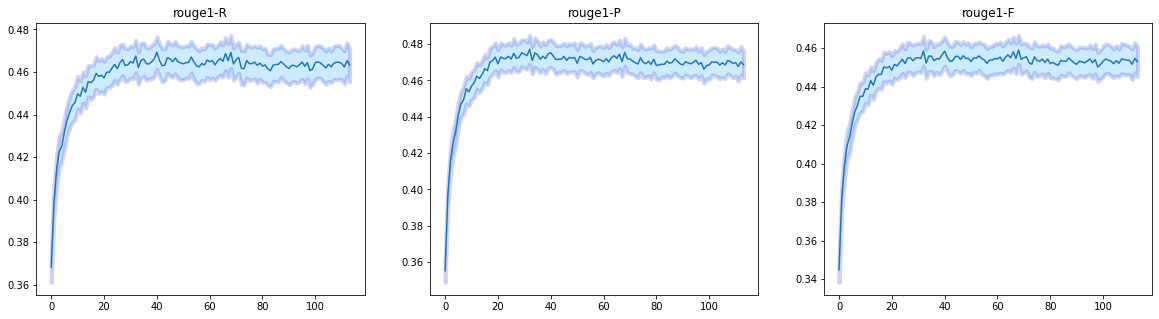

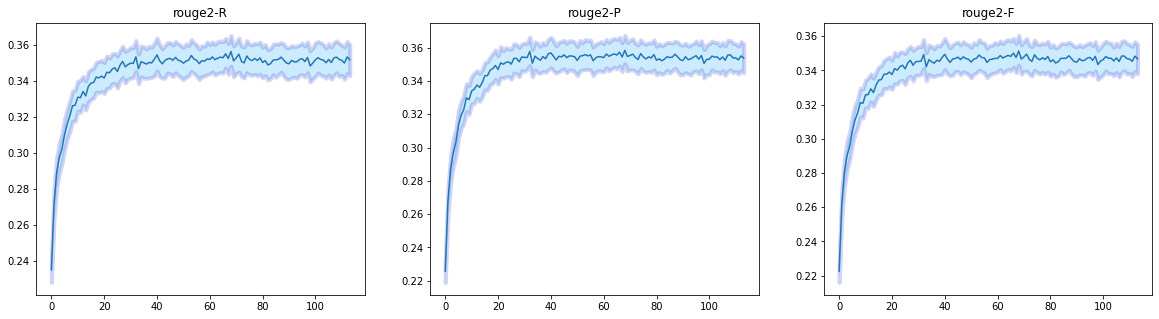

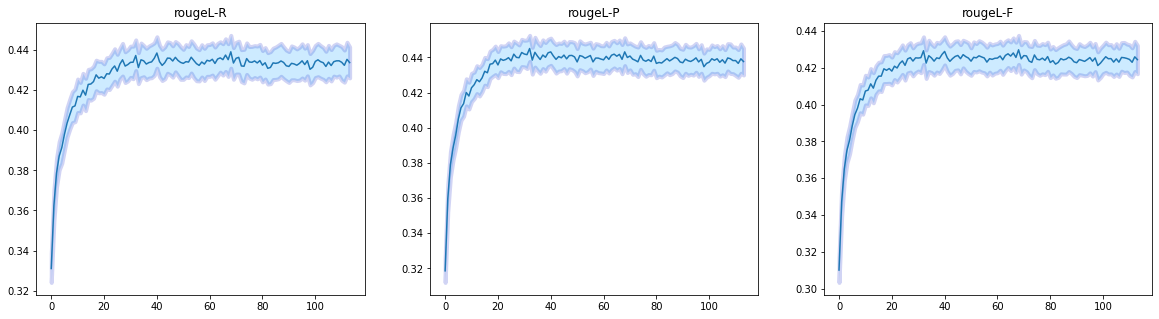

In [6]:
import importlib
plot_rouges = importlib.reload(plot_rouges)

plot_rouges.main(target)

In [7]:
print(paths[-2:-1])
for i, k in enumerate(paths[-2:-1]):
    obj = json_load(k)
    for idx in [0, 2]:
        for j, (target_, pred, source) in enumerate(zip(
            obj[idx]["target"], 
            obj[idx]["preds"], 
            obj[idx]["source"],
        )):
            rich.print(f"[red bold]{i} - {j} - {idx}:")
            pannel = Panel(
                f"[bold blue]Target:[/]  {target_}\n"
                f"[bold blue]Pred:[/]    {pred}\n"
                f"[bold blue]Source:[/]  {source}"
            )
            rich.print(pannel)
    

[PosixPath('/home/mila/g/gagnonju/IteratedDecoding/GAR/gar/outputs/sentence_with_context/valall-112.json')]


0 - 0 - 0:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   `` Does He Love You '' is a song written by Sandy Knox and Billy Stritch , and  │
│ recorded as a duet by American country music artists Reba McEntire and Linda Davis .      │
│ Pred:     Linda Kaye Davis ( born November 26 , 1962 ) is an American country music       │
│ singer .                                                                                  │
│ Source:  <s> who sings does he love me with reba</s>Linda Davis Linda Kaye Davis (born    │
│ November 26, 1962) is an American country music singer. Before beginning a career as a    │
│ solo artist, she had three minor country singles in the charts as one half of the duo     │
│ Skip & Linda. In her solo career, Davis has recorded five studio albums for major record  │
│ labels and more than 15 singles. Her highest chart entry is "Does He Love You", her 1993  │
│ duet with Reba McEntire, which reached number one on the "Billboard" country charts and   │
│ won both singers the Grammy for Best Country Vocal Collaboration. Her highest solo chart  │
│ position</s>2013 & 2015, Davis toured with fellow country singer Kenny Rogers and will    │
│ again accompany him on his "The Gambler's Last Deal" tour in 2017. Linda Davis Linda Kaye │
│ Davis (born November 26, 1962) is an American country music singer. Before beginning a    │
│ career as a solo artist, she had three minor country singles in the charts as one half of │
│ the duo Skip & Linda. In her solo career, Davis has recorded five studio albums for major │
│ record labels and more than 15 singles. Her highest chart entry is "Does He Love You",    │
│ her 1993 duet with Reba McEntire,</s>Joe Billingslea Joseph Billingslea, Jr. (born        │
│ November 14, 1937) is an American singer and performer. He is most noted for being the    │
│ lead singer and the founder of the R&B band The Contours in 1959. The Contours was best   │
│ known for its 1962 hit single, "Do You Love Me". Joseph Billingslea, Jr. was born on      │
│ November 14, 1937 in Hamtramck, Michigan. Before his first birthday, his parents moved to │
│ Detroit where he was raised. He sang with the boys' choir while attending Chadsey High    │
│ School where he graduated in 1954. After graduation, he enlisted in the United States Air │
│ Force.</s>that Judd might record the song if McEntire asked her personally, but added     │
│ that Judd did not want to record songs about "marital problems". McEntire submitted a     │
│ demo to Judd and, after not hearing back from her, recorded the song with Davis in June   │
│ 1993. The single went on to win the Grammy award for Best Country Vocal Collaboration, a  │
│ Country Music Association Award for Vocal Event of the Year, and a /Music City News award │
│ for Best Vocal Collaboration. In 1996, Minnelli released the song as a duet with Donna    │
│ Summer, from Minnelli's album, "Gently". In 1997, it appeared</s>of the trio, both of     │
│ whom were women. It had been pitched to Barbara Mandrell, Frank Sinatra, and Liza         │
│ Minnelli, but McEntire ended up recording it. She had wanted to include Linda Davis, then │
│ a vocalist in her road band, as a duet partner. McEntire's husband and manager, Narvel    │
│ Blackstock, told her that MCA Records "would rather  record this with somebody more       │
│ established", such as Wynonna Judd or Trisha Yearwood, both of whom were on the same      │
│ label at the time. McEntire called Tony Brown, then working as a record producer for both │
│ her and Judd. Brown told her</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p │
│ ad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

0 - 1 - 0:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Warren Hastings laid the foundation of civil service and Charles Cornwallis     │
│ reformed , modernised and rationalised it .                                               │
│ Pred:     Warren Hastings laid the foundation of civil service and Charles Cornwallis     │
│ reformed , modernised and rationalised it .                                               │
│ Source:  <s> who introduced the system of civil services in india</s>administer them. The │
│ civil service system in India is rank-based and does not follow the tenets of the         │
│ position-based civil services. In 2015, the Government of India approved the formation of │
│ Indian Skill Development Service. Further, in 2016, the Government of India approved the  │
│ formation of Indian Enterprise Development Service. Warren Hastings laid the foundation   │
│ of civil service and Charles Cornwallis reformed, modernised and rationalised it. Hence,  │
│ Charles Cornwallis is known as the 'Father of Civil Service in India'. He introduced      │
│ Covenanted Civil Services (Higher Civil Services) and Uncovenanted Civil Services (Lower  │
│ Civil Services). The present civil services of India</s>to urge the adoption for England  │
│ of something similar. The first concrete step in this direction was taken by the British  │
│ East India Company in 1806." In that year, the Honourable East India Company established  │
│ a college, the East India Company College, near London to train and examine               │
│ administrators of the Company's territories in India. "The proposal for establishing this │
│ college came, significantly, from members of the East India Company's trading post in     │
│ Canton, China." Examinations for the Indian "civil service"—a term coined by the          │
│ Company—were introduced in 1829. British efforts at reform were influenced by the         │
│ imperial examinations system</s>and Central Services (Group A) were designated as Central │
│ Superior Services as early as 1924. From 1924 to 1934, Administration in India consisted  │
│ of 10 All India Services and 5 central departments, all under the control of Secretary of │
│ State for India, and 3 central departments under joint Provincial and Imperial Control.   │
│ The present modern civil service was formed after the partition of India in 1947. It was  │
│ Sardar Patel's vision that the Civil Service should strengthen cohesion and national      │
│ unity. The values of integrity, impartiality and merit remain the guiding principles of   │
│ Indian civil services. By the early 21st</s>Indian Civil Service (British India) The      │
│ Indian Civil Service (ICS), for part of the 19th century officially known as the Imperial │
│ Civil Service, was the elite higher civil service of the British Empire in British India  │
│ during British rule in the period between 1858 and 1947. Its members ruled more than 300  │
│ million people in India, Pakistan, Bangladesh and Burma (then comprising British Raj).    │
│ They were ultimately responsible for overseeing all government activity in the 250        │
│ districts that comprised British India. They were appointed under Section XXXII of the    │
│ Government of India Act 1858, enacted by the Parliament of the</s>generally elevated from │
│ the high court bar. The tenure of ICS officers serving as judges of the high court and    │
│ Supreme Court was determined by the retirement age fixed for judges. With the passing of  │
│ the Government of India Act 1919, the Imperial Services headed by the Secretary of State  │
│ for India, were split into two – All India Services and Central Services. Prior to the    │
│ First World War, 95% of ICS officers were Europeans; after the war, the British           │
│ government faced growing difficulties in recruiting British candidates to the service.    │
│ Fewer and fewer young men in Britain were interest

0 - 2 - 0:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   `` Two Out of Three Ai n't Bad '' is a love song performed by the American      │
│ musician Meat Loaf in his solo career , preceded by `` You Took the Words Right Out of    │
│ Pred:     It is a track off his 1977 album Bat Out of Hell , written by Jim Steinman .    │
│ Source:  <s> who wrote the song two out of three ai n 't bad</s>Two Out of Three Ain't    │
│ Bad "Two Out of Three Ain't Bad" is a power ballad performed by the American musician     │
│ Meat Loaf. It is a track off his 1977 album "Bat Out of Hell", written by Jim Steinman.   │
│ It reached #11 on the "Billboard" Hot 100 and earned a million-selling Gold single from   │
│ the RIAA. It remains his second highest-charting hit in the US, behind "I'd Do Anything   │
│ For Love (But I Won't Do That)", and stands as one of his career signature tunes, still   │
│ enjoying recurrent airplay. It was the final song written for the album. In a</s>1997     │
│ debut album "What My Heart Already Knows" and reached No. 10 on the "RPM" Top Country     │
│ Tracks charts. Two Out of Three Ain't Bad "Two Out of Three Ain't Bad" is a power ballad  │
│ performed by the American musician Meat Loaf. It is a track off his 1977 album "Bat Out   │
│ of Hell", written by Jim Steinman. It reached #11 on the "Billboard" Hot 100 and earned a │
│ million-selling Gold single from the RIAA. It remains his second highest-charting hit in  │
│ the US, behind "I'd Do Anything For Love (But I Won't Do That)", and stands as one        │
│ of</s>closest to a simple song, and one Elvis could have done." A music video was shot    │
│ for the single and received significant airplay on television video programs of that day, │
│ a number of years before the conception of MTV. Two mixes were created for the song. In   │
│ the album mix, timed around 5:27, one can hear prominent Moog-synthesizer embellishments  │
│ by session keyboardist Roger Powell. The single mix, timed around 3:50, downmixes the     │
│ synthesizer considerably, in place of a much warmer and predominant string arrangement by │
│ Ken Ascher. This mix also edits out and removes the first lyrical bridge of the</s>2003   │
│ interview for the VH1 "Ultimate Albums" series, Steinman recalls: "I remember Mimi        │
│ Kennedy  telling me, she said, you know, when I was probably complaining why no one liked │
│ my stuff and couldn't get a deal, she says, "Well Steiny, your stuff is so complicated.   │
│ Can't you write something simple?" And while she was saying that the oldies station was   │
│ on the radio and it was playing that old Elvis song, 'I Want You, I Need,' whatever it    │
│ was. 'I Want You, I Need You, I Love You', you know. I just</s>song which includes the    │
│ line, ""There ain't no Coupe de Ville hiding at the bottom of a Cracker Jack box"", and   │
│ does some overlapping, splicing and editing to seamlessly merge back into the second part │
│ of the lyrical bridge, starting with, ""I can't lie, I can't tell you that I'm something  │
│ I'm not"". An additional edit in the last verse removes the lines, ""And though I know    │
│ I'll never get her out of my heart, she never loved me back, Ooh I know, well I remember  │
│ how she left me on a stormy night, oh she kissed me and got</s>                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

0 - 3 - 0:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Since the 2012 -- 13 season , a player needs to have played in a minimum of     │
│ five matches for a title - winning team to qualify for a medal .                          │
│ Pred:     There are four stages to the final .                                            │
│ Source:  <s> how many games to get premier league medal</s>money is divided into three    │
│ parts: half is divided equally between the clubs; one quarter is awarded on a merit basis │
│ based on final league position, the top club getting twenty times as much as the bottom   │
│ club, and equal steps all the way down the table; the final quarter is paid out as        │
│ facilities fees for games that are shown on television, with the top clubs generally      │
│ receiving the largest shares of this. The income from overseas rights is divided equally  │
│ between the twenty clubs. The first Sky television rights agreement was worth £304        │
│ million over five seasons. The</s>proposals consist of a break-even rule and a cap on the │
│ amount clubs can increase their wage bill by each season. With the new television deals   │
│ on the horizon, momentum has been growing to find ways of preventing the majority of the  │
│ cash going straight to players and agents. Central payments for the 2016–17 season        │
│ amounted to £2,398,515,773 across the 20 clubs, with each team receiving a flat           │
│ participation fee of £35,301,989 and additional payments for TV broadcasts (£1,016,690    │
│ for general UK rights to match highlights, £1,136,083 for each live UK broadcast of their │
│ games and £39,090,596 for all overseas</s>issued annually for Manager of the Season,      │
│ Player of the Season. and Goal of the Season. The Golden Boot award is given to the top   │
│ goalscorer of every season, The Playmaker of the Season award is given to the player who  │
│ make the most assists of every season and the Golden Glove award is given to the          │
│ goalkeeper with the most clean sheets at the end of the season. From the 2017–18 season,  │
│ players also receive a milestone award for 100 appearances and every century there after  │
│ and also players who score 50 goals and multiples thereof. Each player to</s>rare event   │
│ that more than two clubs are vying for the title on the final day of the season – then a  │
│ replica won by a previous club is used. The current Premier League trophy was created by  │
│ Royal Jewellers Asprey of London. It consists of a trophy with a golden crown and a       │
│ malachite plinth base. The plinth weighs and the trophy weighs . The trophy and plinth    │
│ are tall, wide and deep. Its main body is solid sterling silver and silver gilt, while    │
│ its plinth is made of malachite, a semi-precious stone. The plinth has a silver           │
│ band</s>twice (a double round-robin system), once at their home stadium and once at that  │
│ of their opponents', for 38 games. Teams receive three points for a win and one point for │
│ a draw. No points are awarded for a loss. Teams are ranked by total points, then goal     │
│ difference, and then goals scored. If still equal, teams are deemed to occupy the same    │
│ position. If there is a tie for the championship, for relegation, or for qualification to │
│ other competitions, a play-off match at a neutral venue decides rank. A system of         │
│ promotion and relegation exists between the Premier League</s><pad><pad><pad><pad><pad><p │
│ ad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>< │
│ pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad> │
│ <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad │
│ ><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>                             │
╰───────────────────────────────────────────────────

0 - 4 - 0:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Because of the importance that he places on the song , Paisley asked Andy       │
│ Griffith to star in the music video , as he felt that Griffith 's personality matched the │
│ personality of the older                                                                  │
│ Pred:     He meets an older man ( Andy Griffith ) who , like him , is `` waitin ' on a    │
│ woman '' .                                                                                │
│ Source:  <s> who is the old man in waiting on a woman</s>appeared on "Play" with a guest  │
│ vocal from Andy Griffith. The song is a mid-tempo composed of three verses. Its central   │
│ character is a recently married male sitting on a bench at a shopping mall, waiting for   │
│ his wife to finish shopping. He meets an older man (Andy Griffith) who, like him, is      │
│ "waitin' on a woman". The older man explains over the next two verses that, although he   │
│ has often had to wait for his wife, he does not mind doing so ("I don't guess we've been  │
│ anywhere / She hasn't made us late, I swear / Sometimes she</s>to be produced and         │
│ distributed by Gramercy Pictures until it was revived in 2015. In 1949, Ed Crane is a     │
│ low-key barber in the town of Santa Rosa, California. He is married to Doris, a           │
│ bookkeeper with a drinking problem, and he works in a barber shop that is owned by his    │
│ brother-in-law, Frank. A customer named Creighton Tolliver tells Ed that he is a          │
│ businessman looking for investors to put up $10,000 in a new technology called "dry       │
│ cleaning". Ed decides to collect money by anonymously blackmailing Doris's boss, "Big     │
│ Dave" Brewster, whom he knows to be having an</s>does it just 'cause she can do it"). He  │
│ tells the younger man that he will often find himself "waitin' on a woman" as well. In    │
│ the third verse, the older male observes that he will most likely die before his wife     │
│ does ("I've read somewhere statistics show / The man's always the first to go"). After    │
│ making this realization, he finally states that he will wait for his wife in Heaven       │
│ (should he die first), because he, too, " mind waitin' on a woman". In the end, the old   │
│ man is seen sitting on a white bench, wearing a</s>himself, is angry that the Widow       │
│ Tillane (angered by Danaher's admission that he had discussed her in the local pub)       │
│ accepts Sean's bid and retaliates by refusing consent for his sister to marry. Several    │
│ town locals, including the Catholic priest, Father Lonergan (Ward Bond) and the village   │
│ matchmaker (and bookmaker) Michaleen Oge Flynn (Barry Fitzgerald), conspire to trick him  │
│ into believing that the wealthy Widow Tillane (Mildred Natwick) wants to marry him, but   │
│ only if Mary Kate is no longer living in his house. After learning the truth on Sean and  │
│ Mary Kate's wedding day, an enraged Will refuses to</s>teenager named Malcolm X John      │
│ Lennon (Austin) is still being breast-fed by his mother (Proctor), and gets in trouble    │
│ with his school principal (Proctor) for studying instead of hanging out and "relating"    │
│ with his peers by smoking marijuana. A US senator who sounds like Robert Kennedy          │
│ (Proctor) chairs a committee which also returns people for re-grooving, and the           │
│ "Secretary of Peace" (Ossman) directs bomber aircraft to drop copies of "Naked Lunch" on  │
│ Nigeria. This single, 17 min 48 sec track begins as a Turkish language instruction        │
│ record, and immediately follows its listener on a Kafkaesque trip overseas. An unnamed in │
│ nocent</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad │
│ ><pad><pad><pad><pad>                                                                     │
╰───────────────────────────────────────────────────

0 - 5 - 0:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   In the fifth season premiere , Blair continues to plan her wedding , but begins │
│ to encounter problems in her relationship with Louis .                                    │
│ Pred:     Blair gets pregnant and announces it to the gang , who are shocked .            │
│ Source:  <s> who got pregnant in gossip girl season 5</s>man and Lorelai as maid of       │
│ honour. Emily invites Christopher and encourages him to pursue Lorelai, resulting in Luke │
│ and Lorelai splitting for a time and both Lorelai and Rory falling out with Emily,        │
│ although Rory continues to attend Friday night dinners alone as part of their deal. Lane  │
│ is shocked to realise she has feelings for Zach and they start dating, but she surprises  │
│ them both by revealing she wants to wait for marriage before having sex. Paris returns    │
│ from Oxford and reveals Asher has died of a heart attack, but is soon dating Doyle.       │
│ Sookie becomes pregnant again</s>during the season. The return of Izzie's deceased fiancé │
│ Denny and the resumption of their romance during the season also proved unpopular with    │
│ fans, and was deemed "the world's worst storyline" by Mary McNamara of the "Los Angeles   │
│ Times". McNamara was also critical of the episode "Now or Never", which saw Izzie         │
│ flatline following neurosurgery, opining that Izzie ought to die. The episode in which    │
│ Izzie married long-term love Alex received 15.3 million viewers, the largest television   │
│ audience of the night. Izzie's cancer storyline received a mixed response from the        │
│ medical community. Otis Brawley, chief medical officer at the American</s>and has a       │
│ daughter, before ordering Jackson to have a vasectomy. Jackson stands against Taylor as   │
│ town selectman and is elected but is soon overwhelmed with work. Michel wins a camper van │
│ on "The Price is Right" but soon sells it. Kirk decides to move out of his mother's place │
│ to spend more time with Lulu but forgets to find somewhere to move to so ends up finding  │
│ various places to stay. When Old Man Twickham dies, he and Luke compete to buy it but the │
│ town elders decide Luke wants it more. Despite romantic overtures from Marty, Rory        │
│ is</s>William van der Woodsen, for the season's 17th episode, which aired in February     │
│ 2012. It was also reported that Desmond Harrington, who made a cameo appearance in the    │
│ fall finale, would return as Chuck's uncle, Jack Bass. Also guest starring was "One Life  │
│ to Live"s alum David A. Gregory as a friend of the real Charlie Rhodes (Ella Rae Peck).   │
│ Cobra Starship's Gabe Saporta made a cameo in season 5 finale. Season five opens in Los   │
│ Angeles, where a vacationing Chuck and Nate decide to visit Serena, who is working on a   │
│ film set. Back in New York, Blair learns</s>St. Vincent performed "Cruel" and             │
│ "Cheerleader" from her "Strange Mercy" album during the Valentine's Day episode. Blake    │
│ Lively, Leighton Meester, Penn Badgley, Chace Crawford, and Ed Westwick all returned as   │
│ series regulars. Kaylee DeFer was upgraded to series regular status, while Taylor Momsen  │
│ and Jessica Szohr exited the show, though they were both invited back as guest stars.     │
│ Kelly Rutherford and Matthew Settle also returned as regulars. On April 6, 2011, "10      │
│ Things I Hate About You" star Ethan Peck landed a guest-starring role on the show. Peck   │
│ made his debut in the fourth season finale and was in talks</s><pad><pad><pad><pad><pad>< │
│ pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad> │
│ <pad><pad><pad><pad><pad><pad>                                                            │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

0 - 6 - 0:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Men 's Singles 2017 Australian Open Champion Roger Federer Runner - up Rafael   │
│ Nadal Final score 6 -- 4 , 3 -- 6 , 6 -- 1 , 3 -- 6 , 6 --                                │
│ Pred:     Men 's Singles 2017 Australian Open Champion Roger Federer Runner - up Rafael   │
│ Nadal Final score 6 -- 4 , 3 -- 6 , 6 -- 1 , 3— 6 , 7 --                                  │
│ Source:  <s> who wins the 2017 australian open men 's single title</s>2017 Australian     │
│ Open – Men's Singles Novak Djokovic was the two-time defending champion, but lost in the  │
│ second round to the 117th ranked Denis Istomin from Uzbekistan. It was the first time     │
│ since the 2008 Wimbledon Championships, where he lost to Marat Safin, that Djokovic       │
│ failed to make it past the second round of a major and the first time since the 2006      │
│ Australian Open that he failed to make it to the third round in Melbourne. Roger Federer  │
│ won his fifth Australian Open title, and 18th Major title overall, defeating Rafael Nadal │
│ in the final in five sets. With</s>Slam champion since Ken Rosewall had won the 1972      │
│ Australian Open at 37 years and 63 days old. Andy Murray "(Fourth round)" 2017 Australian │
│ Open – Men's Singles Novak Djokovic was the two-time defending champion, but lost in the  │
│ second round to the 117th ranked Denis Istomin from Uzbekistan. It was the first time     │
│ since the 2008 Wimbledon Championships, where he lost to Marat Safin, that Djokovic       │
│ failed to make it past the second round of a major and the first time since the 2006      │
│ Australian Open that he failed to make it to the third round in Melbourne. Roger</s>The   │
│ most striking difference between this match and past Fedal Slam finals is that Federer    │
│ hit more than double the number of winning shots than Nadal, 73 to 35. Winning his 5th    │
│ Australian Open men's singles title, Roger Federer extended his all-time record of Grand  │
│ Slam titles to 18, pulling four ahead of the second all-time count of 14 held by Rafael   │
│ Nadal and Pete Sampras. Federer also became the first man ever to win at least 5 singles  │
│ majors at 3 different Grand Slams each (Australian Open, Wimbledon, and US Open). In      │
│ addition to being denied his third effort</s>2017 Australian Open – Men's singles final   │
│ The 2017 Australian Open Men's Singles final was the championship tennis match of the     │
│ Men's Singles tournament at the 2017 Australian Open. It was contested between Roger      │
│ Federer and Rafael Nadal, ranked 17th and 9th in the world respectively. It was their     │
│ record ninth meeting in a Grand Slam final in their rivalry, and their 1st meeting in a   │
│ Grand Slam final since the 2011 French Open. In a rematch of the 2009 Australian Open     │
│ final, which Nadal won in 5 sets, Roger Federer won the duel in 5 sets, beating Nadal     │
│ for</s>the win, Federer became the first male player to win at least five titles at three │
│ Grand Slam tournaments (five at the Australian Open, seven at Wimbledon and five at the   │
│ US Open). The win was also Federer's first title on the ATP tour in over 12 months; his   │
│ last win was at Basel on 1 November 2015. This was the first Grand Slam tournament in     │
│ which Andy Murray started as World No. 1 and top seed. Murray retained the top ranking    │
│ despite losing to Mischa Zverev in the fourth round, because second seeded Djokovic       │
│ needed to win the tournament</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p │
│ ad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>< │
│ pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad> │
│ <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>                                   │
╰───────────────────────────────────────────────────

0 - 7 - 0:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   The scene , located amongst the New York Street backlot sets in the heart of    │
│ the studios , was destroyed by a massive fire in 2008 , and was replaced by King Kong :   │
│ 360 3 -                                                                                   │
│ Pred:     The scene , located amongst the New York Street backlot sets in the heart of    │
│ the studios , was destroyed by a massive fire in 2008 , and was replaced by King Kong :   │
│ The Revenge of                                                                            │
│ Source:  <s> when did the king kong ride burn down</s>King Kong Encounter King Kong       │
│ Encounter was an attraction formerly part of the Studio Tour at Universal Studios         │
│ Hollywood. The scene, located amongst the New York Street backlot sets in the heart of    │
│ the studios, was destroyed by a massive fire in 2008, and was replaced by , which was     │
│ opened on 1 July 2010. The show began as the tour tram entered the soundstage and stopped │
│ in front of an apartment building facade where guests watched a breaking news report      │
│ about Kong's rampage on television monitors located inside of the building's windows. A   │
│ news chopper circling overhead was covering</s>song My Sacrifice at the Kongfrontation in │
│ 2001. The band filled the "New York-styled" street of the attraction with water for       │
│ filming and the rest of the video was filmed elsewhere at the park. Kongfrontation        │
│ Kongfrontation was a ride at the Universal Studios Florida theme park, in Orlando,        │
│ Florida, the main attraction in the park's New York section. It opened as one of the      │
│ original attractions at the park on June 7, 1990 and was closed on September 8, 2002;     │
│ Revenge of the Mummy opened in its place on May 21, 2004. Kongfrontation was based on the │
│ 1976 "King Kong"</s>the evening of August 23, 1999, a 20-year-old man was thrown from the │
│ train's final turn at a speed of sustaining a fatal head injury upon contact with a steel │
│ walkway. Shockwave and two similar rides at other Paramount amusement parks were          │
│ immediately closed. The event was originally reported as "an accident  resulted in the    │
│ death of one park visitor," but further investigation proved otherwise. Bolstered by      │
│ numerous eyewitness accounts, the cause was later attributed to the victim's disregard of │
│ park safety rules as he was seen intentionally freeing himself from restraints. In        │
│ addition, an inspection found the safety</s>and Universal Orlando Resort in Orlando,      │
│ Florida. The first King Kong attraction was called King Kong Encounter and was a part of  │
│ the Studio Tour at Universal Studios Hollywood. Based upon the 1976 film "King Kong", the │
│ tour took the guests in the world of 1976 New York City, where Kong was seen wreaking     │
│ havoc on the city. It was opened on June 14, 1986 and was destroyed on June 1, 2008 in a  │
│ major fire. Universal opened a replacement 3D King Kong ride called "" that opened on     │
│ July 1, 2010, based upon Peter Jackson's 2005 film "King Kong".</s>experience. Following  │
│ the loss of Kong, the Earthquake tour scene is featured more often in Universal Studios   │
│ Hollywood promotional materials and the Collapsing Bridge tour scene was reopened. King   │
│ Kong Encounter King Kong Encounter was an attraction formerly part of the Studio Tour at  │
│ Universal Studios Hollywood. The scene, located amongst the New York Street backlot sets  │
│ in the heart of the studios, was destroyed by a massive fire in 2008, and was replaced by │
│ , which was opened on 1 July 2010. The show began as the tour tram entered the soundstage │
│ and stopped in front of an apartment</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad │
│ ><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

0 - 0 - 2:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Dave Johnson is an American announcer and sportscaster , best known for his     │
│ work in horse racing with ABC and NBC Sports and at various race tracks in New York and   │
│ New Jersey .                                                                              │
│ Pred:     Dave Johnson is an American announcer and sportscaster , best known for his     │
│ work in horse racing with ABC and NBC Sports and at various race tracks in New York and   │
│ New Jersey .                                                                              │
│ Source:  <s> who said and down the stretch they come</s>Dave Johnson (announcer) Dave     │
│ Johnson is an American announcer and sportscaster, best known for his work in horse       │
│ racing with ABC and NBC Sports and at various race tracks in New York and New Jersey. His │
│ signature line — "And "down" the stretch they come!" — is instantly recognizable          │
│ throughout the sport, and often imitated by comedians, notably David Letterman. From 1972 │
│ to 1977, Johnson was the public address announcer for the tracks of the New York Racing   │
│ Association. In 1977 he moved to the new Meadowlands Racetrack in New Jersey, calling     │
│ both Thoroughbred and harness racing. He maintained his</s>the stretch they come!"        │
│ Johnson portrayed himself as the track announcer at Belmont Park in the film "Ruffian,"   │
│ about the famous match race in 1975 in which the filly Ruffian broke down as she raced    │
│ Foolish Pleasure. Dave Johnson (announcer) Dave Johnson is an American announcer and      │
│ sportscaster, best known for his work in horse racing with ABC and NBC Sports and at      │
│ various race tracks in New York and New Jersey. His signature line — "And "down" the      │
│ stretch they come!" — is instantly recognizable throughout the sport, and often imitated  │
│ by comedians, notably David Letterman. From 1972 to</s>to alter the pitch of a track      │
│ using a potentiometer (a tape speed control). After recording the drum track at the       │
│ standard speed, he played it back through headphones while recording the voiceover. As he │
│ did this, he gradually reduced the tape speed and slowly returned it to normal speed      │
│ while reciting the lyrics in time with the relative speed of the drum track. This gave    │
│ him the idea for a song based on the rhythm of the old Scottish tune "The Campbells Are   │
│ Coming". The lyrics describe the effect on the mental health of an individual after a     │
│ break-up.</s>character Professor Burris in "Walden Two", who is in a confused mood of     │
│ desperation, lack of orientation, irresolution and indecision. (Prentice Hall 1976,       │
│ Chapter 31, p. 266). This line is also quoted in Ernest Hemingway's novel "A Farewell to  │
│ Arms", as in Arthur C. Clarke's short story, "The Ultimate Melody". The same line appears │
│ in full in the opening minutes of Michael Powell and Emeric Pressburger's "A Matter of    │
│ Life and Death" (1946), spoken by the protagonist, pilot and poet Peter Carter: 'But at   │
│ my back I always hear / Time's wingèd chariot hurrying near; And yonder all before        │
│ us</s>to be expressed, and Coleridge immediately threw off the stanza thus:- I objected   │
│ to the rhyme, 'dear brother Jim,' as being ludicrous, but we all enjoyed the joke of      │
│ hitching-in our friend, James T —'s name, who was familiarly called Jim. He was brother   │
│ of the dramatist, and this reminds me of an anecdote which it may be worth while here to  │
│ notice. The said Jem got a sight of the Lyrical Ballads as it was going through the press │
│ at Bristol, during which time I was residing in that city. One evening he came to me with │
│ a grave</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pa │
│ d><pad><pad><pad><pad><pad><pad>                  

0 - 1 - 2:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   During the battle between Alpha - Omega and the northern army , the escaping    │
│ apes come under fire from Alpha - Omega .                                                 │
│ Pred:     The war between Alpha - Omega and the Eastern lowland gorillas ends with the    │
│ eastern lowland gorilla forces winning and Alpha - Alpha is forced to retreat to a cave . │
│ Source:  <s> who wins the war for planet of the apes</s>War for the Planet of the Apes    │
│ War for the Planet of the Apes is a 2017 American science fiction film directed by Matt   │
│ Reeves and written by Mark Bomback and Reeves. A sequel to "Rise of the Planet of the     │
│ Apes" (2011) and "Dawn of the Planet of the Apes" (2014), it is the third installment in  │
│ the "Planet of the Apes" reboot series. The film stars Andy Serkis, Woody Harrelson and   │
│ Steve Zahn, and follows a confrontation between the apes, led by Caesar, and the humans   │
│ for control of Earth. Like its predecessor, its premise shares several                    │
│ similarities</s>Visual Effects at the 71st British Academy Film Awards, and was also      │
│ nominated for Best Visual Effects at the 90th Academy Awards. It was also nominated for   │
│ four Saturn Awards, including Best Director for Reeves and Best Actor for Serkis. Two     │
│ years after the misanthropic bonobo Koba attacked the human survivors in San Francisco,   │
│ Caesar and his tribe of intelligent apes have been forced against a rogue U.S. military   │
│ faction known as Alpha-Omega led by a ruthless colonel. Alpha-Omega employs other apes    │
│ formerly loyal to Koba, derogatorily called "donkeys". An Alpha-Omega platoon launches an │
│ attack on an ape outpost, but</s>Simian Flu virus had mutated, and the human carriers     │
│ subsequently became mute and devolved into a primitive state. He then has Caesar tortured │
│ with starvation to force the other apes to work. The mute girl, named Nova by Maurice,    │
│ sneaks into the facility to give Caesar food, water, and her rag doll. To prevent her     │
│ from being discovered, Rocket allows himself to be captured as a diversion. The next day, │
│ the Colonel comes to see if Caesar is still alive, and confiscates the doll upon          │
│ discovering it. Together, Caesar and Rocket are able to work out a means of               │
│ escape</s>grenade launcher to kill Preacher, saving Caesar's life, before he is killed by │
│ a soldier. Caesar succeeds in blowing up the tank and escapes the facility as it is       │
│ destroyed in a chain reaction, resulting in an avalanche that wipes out the military. The │
│ apes, carrying Nova, all survive by climbing nearby trees. They then cross the desert to  │
│ find an oasis. While the other apes celebrate their new home, Maurice discovers Caesar's  │
│ fatal wound. He promises to tell Cornelius who his father was and what he did for the     │
│ apes. Caesar then dies peacefully while Maurice mourns his death</s>to have him see       │
│ reason. Aldo plots a coup d'état in order for the gorillas to take control. Cornelius     │
│ happens to overhear from a nearby tree and is critically wounded when Aldo spots him and  │
│ hacks the tree branch he is on. The next day, after a gorilla scouting pair are attacked  │
│ by Kolp's men, Aldo takes advantage of a grieving Caesar's absence to have all humans     │
│ corralled while looting the armory. Cornelius eventually dies from his wounds, leaving a  │
│ devastated Caesar with a revelation that Cornelius was not hurt by humans. When Kolp's    │
│ ragtag force launches their attack, Caesar</s><pad><pad><pad><pad><pad><pad><pad><pad><pa │
│ d><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p │
│ ad><pad><pad><pad><pad><pad><pad><pad><pad>                                               │
╰───────────────────────────────────────────────────

0 - 2 - 2:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   94 Specials 23 December 2017 ( 2017 - 12 - 23 ) 30 December 2017 ( 2017 - 12 -  │
│ 30 ) N / A 15 7 24 February 2018 ( 2018 - 02 - 24 )                                       │
│ Pred:     94 94 11 `` The Ultimate Mega-Challenge '' April 21 , 2018 ( 2018 - 04 - 21 )   │
│ 7.                                                                                        │
│ Source:  <s> when does ant and dec saturday night takeaway 2018 start</s>studio's closure │
│ for redevelopment as had been announced in February 2017. Starting from the sixteenth     │
│ series, the programme will be aired from the newly redeveloped Television Centre; it is   │
│ currently scheduled to start airing in 2020, following the decision by Anthony McPartlin  │
│ to suspend his TV duties. The general set up for each episode is a selection of segments  │
│ consisting of specially crafted games, comedy/entertainment films, participation by       │
│ either a studio audience member, or unsuspecting viewer/public member, and a show finale  │
│ consisting of a performance by a musician, dance group, singer, or group performers.      │
│ Episodes of "Saturday Night Takeaway" are</s>Programme, alongside the presenters winning  │
│ the award for Entertainment Performance in 2014 and 2015 respectively. Since its          │
│ thirteenth series in 2016, the show has aired its series finale outside of the UK. In     │
│ 2017, "Saturday Night Takeaway" became the first UK show to be aired live from Walt       │
│ Disney World, which it repeated again in 2018 for its series finale being aired live from │
│ Universal Orlando. On 3 March 2018, the show celebrated its 100th episode, while the      │
│ penultimate episode of the fifteenth series on 31 March was the final one to be aired     │
│ from The London Studios, before the</s>Ant & Dec's Saturday Night Takeaway Ant & Dec's    │
│ Saturday Night Takeaway (referred to simply as Saturday Night Takeaway or SNT) is a       │
│ British television variety show, presented by Ant & Dec, both of whom also act as the     │
│ show's executive producers, and broadcast on ITV since its premiere on 8 June 2002. Its   │
│ format is heavily influenced by previous Saturday night light entertainment shows, most   │
│ notably "Noel's House Party" and "Don't Forget Your Toothbrush", while individual items   │
│ often pay homage to Saturday night TV of the past, such as "Opportunity Knocks". The show │
│ is notable for a quiz show</s>"Play Your Cards Right", "Bullseye", "Take Your Pick!",     │
│ "The Golden Shot" and "Sale of the Century". In 2002, Ant & Dec created and presented     │
│ their own show, entitled "Ant & Dec's Saturday Night Takeaway". The show has so far run   │
│ for fifteen series, with the latest, including the 100th episode, airing in early 2018.   │
│ The first series was not an overall success, but with the introduction of "Ant & Dec      │
│ Undercover", "What's Next?", "Ant v Dec" and "Little Ant and Dec", the show became a hit. │
│ During the fourth series, Dec broke his arm, thumb and suffered a concussion              │
│ whilst</s>budget at the box office. It has since gained a cult following from fans of the │
│ pair. In 2013, they reprised their roles as P.J and Duncan on Ant & Dec's Saturday Night  │
│ Takeaway. 1994 1995 1996 1997 1998 2000 2001 2002 2005 2006 2007 2008 2009 2010 2012 2013 │
│ 2014 2015 2017 Ant & Dec Ant & Dec are an English TV presenting duo, consisting of        │
│ Anthony McPartlin (born 18 November 1975) and Declan Donnelly (born 25 September 1975),   │
│ from Newcastle upon Tyne, England. Formed after their meeting as actors on CBBC's drama,  │
│ "Byker Grove", they performed together as</s><pad><pad><pad><pad><pad><pad><pad><pad><pad │
│ ><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>                                  │
╰───────────────────────────────────────────────────

0 - 3 - 2:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Karyn Parsons -- Rockwell ( born October 8 , 1966 ) is an American actress ,    │
│ best known for her role as Hilary Banks on the NBC sitcom The Fresh Prince of Bel - Air   │
│ Pred:     Karyn Parsons ( born October 8 , 1966 ) is an American actress .                │
│ Source:  <s> who played hillary on the fresh prince of bel-air</s>2008. On July 31, 2010, │
│ she became an honorary member of Delta Sigma Theta sorority, during their 50th national   │
│ convention in New Orleans. She has one son, Chris Tubbs and two stepchildren, Timothy II  │
│ (b. 1968) and Tori Reid (b. 1971); and has three grandchildren. Daphne Maxwell Reid       │
│ Daphne Etta Maxwell-Reid (born July 13, 1948) is an American actress and comedian. She is │
│ best known for her role as the second Vivian Banks on the NBC sitcom "The Fresh Prince of │
│ Bel-Air" from 1993 until 1996. Reid was born in New York City, the daughter of Rosalee    │
│ and Green Maxwell.</s>and "Tyler Perry's House of Payne", among others. In November 2018, │
│ it was announced that Hubert had been cast on the daytime soap opera, "General Hospital"; │
│ she will make her debut as Yvonne on December 7, 2018. Janet Hubert Janet Louise Hubert   │
│ (born January 13, 1956) is an American film and television actress. She is best known for │
│ playing the role of the original Vivian Banks on the sitcom "The Fresh Prince of Bel-Air" │
│ from its first season 1990 until the end of its third season in 1993. Hubert was          │
│ nominated for an NAACP Image Award for Outstanding Actress in</s>Janet Hubert Janet       │
│ Louise Hubert (born January 13, 1956) is an American film and television actress. She is  │
│ best known for playing the role of the original Vivian Banks on the sitcom "The Fresh     │
│ Prince of Bel-Air" from its first season 1990 until the end of its third season in 1993.  │
│ Hubert was nominated for an NAACP Image Award for Outstanding Actress in a Comedy Series  │
│ for her role in 1991. Hubert was born in Chicago, Illinois and spent her early days       │
│ growing up on Chicago's South Side. At the age of nine she moved with her family to       │
│ rural</s>Daphne Maxwell Reid Daphne Etta Maxwell-Reid (born July 13, 1948) is an American │
│ actress and comedian. She is best known for her role as the second Vivian Banks on the    │
│ NBC sitcom "The Fresh Prince of Bel-Air" from 1993 until 1996. Reid was born in New York  │
│ City, the daughter of Rosalee and Green Maxwell. She is a graduate of The Bronx High      │
│ School of Science. She received a degree in interior design and architecture from         │
│ Northwestern University, which she attended on a scholarship and where she became the     │
│ first African-American woman to be named homecoming queen. While at Northwestern</s>The   │
│ first in the series is about Henry "Box" Brown, a slave who mailed himself to freedom.    │
│ Parsons married "The Young and the Restless" actor Randy Brooks in 1987; they divorced in │
│ 1990. Parsons married director Alexandre Rockwell in 2003. Together they have a daughter, │
│ Lana (born June 8, 2003), and a son, Nico (born April 11, 2007). Karyn Parsons Karyn      │
│ Parsons (born October 8, 1966) is an American actress and comedian. She is best known for │
│ her role as Hilary Banks on the NBC sitcom "The Fresh Prince of Bel-Air" from 1990 to     │
│ 1996. Parsons also starred in                                                             │
│ the</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>             │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

0 - 4 - 2:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Year Host Continent Winner 1930 Uruguay South America Uruguay 1934 Italy Europe │
│ Italy 1938 France Europe Italy 1942 Cancelled because of World War II 1946 Cancelled      │
│ because of World War II 1950 Brazil South America Uruguay                                 │
│ Pred:     1934 Italy Europe Italy 1938 France Europe Italy                                │
│ Source:  <s> when did italy host the fifa world cup</s>present in 18 out of the 21        │
│ tournaments, reaching six finals, a third place and a fourth place. Champions Runners-up  │
│ Third Place Fourth Place "Italy's score listed first" With temperatures around 40 °C (104 │
│ °F), Italy won their home tournament in 1934 after going into extra time against          │
│ Czechoslovakia. After a difficult route to the final, defeating hosts France in the       │
│ quarter-finals and Brazil in the semis, Italy was the first team to win the World Cup     │
│ title on foreign ground. Also, it was the first of only two times in World Cup history    │
│ that a team successfully defended their</s>1982 FIFA World Cup The 1982 FIFA World Cup,   │
│ the 12th FIFA World Cup, was held in Spain from 13 June to 11 July 1982. The tournament   │
│ was won by Italy, who defeated West Germany 3–1 during the final match, held in the       │
│ Spanish capital of Madrid. It was Italy's third World Cup win and first since 1938. The   │
│ defending champions Argentina were eliminated in the second group round. Algeria,         │
│ Cameroon, Honduras, Kuwait and New Zealand made their first appearances in the finals.    │
│ The tournament featured the first penalty shoot-out in World Cup competition. It was also │
│ the third time</s>the first World Cup coincided with the centennial anniversary of the    │
│ first Constitution of Uruguay. For that reason, the main stadium built in Montevideo for  │
│ the World Cup was named Estadio Centenario. Bids: Sweden decided to withdraw before the   │
│ vote, allowing the only remaining candidate Italy to take the hosting job for the 1934    │
│ World Cup. The decision was ratified by the FIFA Congress in Stockholm, Sweden and        │
│ Zürich, Switzerland on 14 May 1932. The Italian Football Federation accepted the hosting  │
│ duties on 9 October 1932. Results: Bids: Without any nations withdrawing their bids, the  │
│ FIFA Congress convened in Berlin,</s>1938 FIFA World Cup The 1938 FIFA World Cup was the  │
│ third staging of the World Cup, and was held in France from 4 to 19 June 1938. Italy      │
│ retained the championship by beating Hungary 4–2 in the final. Italy's 1934 and 1938      │
│ teams became the only ones to have won two World Cups under the same coach, Vittorio      │
│ Pozzo. France was chosen as host nation by FIFA in Berlin on 13 August 1936. France was   │
│ chosen over Argentina and Germany in the first round of voting. The decision to hold a    │
│ second consecutive tournament in Europe (after Italy in</s>Tango España. 1982 FIFA World  │
│ Cup The 1982 FIFA World Cup, the 12th FIFA World Cup, was held in Spain from 13 June to   │
│ 11 July 1982. The tournament was won by Italy, who defeated West Germany 3–1 during the   │
│ final match, held in the Spanish capital of Madrid. It was Italy's third World Cup win    │
│ and first since 1938. The defending champions Argentina were eliminated in the second     │
│ group round. Algeria, Cameroon, Honduras, Kuwait and New Zealand made their first         │
│ appearances in the finals. The tournament featured the first penalty shoot-out in World   │
│ Cup competition. It was also the</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pa │
│ d><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p │
│ ad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>< │
│ pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><

0 - 5 - 2:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Joseph Peter Spano ( born July 7 , 1946 ) is an American actor is best known    │
│ for his role as Lt.                                                                       │
│ Pred:     Lee Allen Tergesen ( born July 8 , 1965 ) is an American actor .                │
│ Source:  <s> who is the actor that plays tobias on ncis</s>Ed Sanders (actor) Edward      │
│ William "Ed" Sanders (born 4 February 1993) is an English actor, singer and record        │
│ producer. He is best known for his performance as Tobias Ragg in the 2007 film "". He was │
│ also featured on the . He also appeared in the award-winning historical adventure drama   │
│ film "Hugo" in 2011, where he was part of the ensemble. Sanders was educated at Copthorne │
│ Preparatory School and sat his GCSE Exams at Ardingly College. He then moved up to London │
│ and continued his education part-time at Kensington and Chelsea College whilst working as │
│ an apprentice in recording studios</s>Lee Tergesen Lee Allen Tergesen (born July 8, 1965) │
│ is an American actor. He is best known for his roles as Chett Donnelly in the TV spin-off │
│ of Weird Science (TV series), Tobias Beecher in HBO's prison drama "Oz" and as Evan       │
│ Wright in "Generation Kill," as well as guest starring in many other series. Tergesen was │
│ born in Ivoryton, Connecticut and graduated from Valley Regional High School in nearby    │
│ Deep River. He moved to New York at the age of 18 to try to become an actor. He graduated │
│ from the American Musical and Dramatic Academy (AMDA)'s two-year program</s>a unique      │
│ artist who has really captured something special in the way he writes and produces. We’ve │
│ had an eye on him for quite some time, so are thrilled be his publisher and look forward  │
│ to a very bright future.’ Ed Sanders (actor) Edward William "Ed" Sanders (born 4 February │
│ 1993) is an English actor, singer and record producer. He is best known for his           │
│ performance as Tobias Ragg in the 2007 film "". He was also featured on the . He also     │
│ appeared in the award-winning historical adventure drama film "Hugo" in 2011, where he    │
│ was part of the</s>Otomo in 2011; their daughter Lily was born December 5, 2012. He is    │
│ the brother-in-law of actress Toni Lewis by her marriage to Lee's brother, Chris (who     │
│ served as the music supervisor on "Oz"). Lee Tergesen Lee Allen Tergesen (born July 8,    │
│ 1965) is an American actor. He is best known for his roles as Chett Donnelly in the TV    │
│ spin-off of Weird Science (TV series), Tobias Beecher in HBO's prison drama "Oz" and as   │
│ Evan Wright in "Generation Kill," as well as guest starring in many other series.         │
│ Tergesen was born in Ivoryton, Connecticut and graduated from Valley Regional</s>Ken      │
│ Jennings (actor) Ken Jennings (born October 10, 1947) is an American stage actor most     │
│ famous for his role as Tobias Ragg in the 1979 Broadway premiere of Stephen Sondheim's    │
│ "". Jennings received the 1979 Drama Desk Award for Outstanding Featured Actor in a       │
│ Musical for this role. He has also performed in several other shows, including            │
│ "Urinetown" in 2001. Jennings was born in Jersey City, New Jersey. He attended St.        │
│ Peter's Preparatory School and St. Peter's College, both Catholic schools located in his  │
│ hometown of Jersey City. He performed the voice of "Hunter #2" in the 1982 animated       │
│ film</s>                                                                                  │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

0 - 6 - 2:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   The Vice-President of India ( currently , Venkaiah Naidu ) is the ex-officio    │
│ Chairman of the Rajya Sabha , who presides over its sessions .                            │
│ Pred:     The Vice President of India ( currently , Venkaiah Naidu ) is the ex-officio    │
│ Chairman of the Rajya Sabha , who presides over its sessions .                            │
│ Source:  <s> who is the chair person of rajya sabha</s>sittings of the Houses of          │
│ Parliament of India are rare, and in the history of the Republic, only three such         │
│ joint-sessions have been held; the latest one for the passage of the 2002 Prevention of   │
│ Terrorism Act. The Vice President of India (currently, Venkaiah Naidu) is the             │
│ "ex-officio" Chairman of the Rajya Sabha, who presides over its sessions. The Deputy      │
│ Chairman, who is elected from amongst the house's members, takes care of the day-to-day   │
│ matters of the house in the absence of the Chairman. The Rajya Sabha held its first       │
│ sitting on 13 May 1952. The salary and other benefits</s>the President. The 12 nominated  │
│ members of the Rajya Sabha are persons who are eminent in particular fields, and are well │
│ known contributors in the particular field. Members of Rajya Sabha by their political     │
│ party (As of 16 December 2018): Besides the Chairman (Vice-President of India) and the    │
│ Deputy Chairman, there is also a position called "Leader of the House". This is a cabinet │
│ minister – the Prime Minister if he is a member of the House, or another nominated        │
│ Minister. The Leader has a seat next to the Chairman, in the front row. Besides the       │
│ Leader of the House,</s>complex. The new building is being considered on account of the   │
│ stability concerns regarding the current complex. A committee to suggest alternatives to  │
│ the current building has been set up by the Former Speaker, Meira Kumar. The present      │
│ building, an 85-year-old structure suffers from inadequacy of space to house members and  │
│ their staff and is thought to suffer from structural issues. The building also needs to   │
│ be protected because of its heritage tag. The Indian Parliament consists of two houses    │
│ called the Lok Sabha and the Rajya Sabha with the President of India acting as their      │
│ head. The President of</s>Rajya Sabha The Rajya Sabha or Council of States is the upper   │
│ house of the Parliament of India. Membership of Rajya Sabha is limited by the             │
│ Constitution to a maximum of 250 members, and current laws have provision for 245         │
│ members. Most of the members of the House are indirectly elected by state and territorial │
│ legislatures using single transferable votes, while the President can appoint 12 members  │
│ for their contributions to art, literature, science, and social services. Members sit for │
│ staggered terms lasting six years, with a third of the members up for election every two  │
│ years. The Rajya Sabha</s>for a member of Rajya Sabha are same as for a member of Lok     │
│ Sabha. Rajya Sabha members are elected by state legislatures rather than directly through │
│ the electorate by single transferable vote method. From 18 July 2018, Rajya Sabha MPs can │
│ speak in 22 Indian languages in House as the Upper House has facility for simultaneous    │
│ interpretation in all the 22 official languages of India. Article 84 of the Constitution  │
│ lays down the qualifications for membership of Parliament. A member of the Rajya Sabha    │
│ must: In addition, twelve members are nominated by the President of India having special  │
│ knowledge</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>< │
│ pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad> │
│ <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

0 - 7 - 2:

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ Target:   Capital punishment is a legal penalty in the United States , currently used by  │
│ 31 states , the federal government , and the military .                                   │
│ Pred:     Capital punishment is a legal penalty in the United States , currently used by  │
│ 31 states and the federal government .                                                    │
│ Source:  <s> how many states in the us have the death penalty 2018</s>table of the 20     │
│ states and the date that the state abolished the death penalty. From 1976 to July 1,      │
│ 2018, there were 1,477 executions, of which 1,302 were by lethal injection, 158 by        │
│ electrocution, 11 by gas inhalation, 3 by hanging, and 3 by firing squad. The South had   │
│ the great majority of these executions, with 1,207; there were 181 in the Midwest, 85 in  │
│ the West, and only 4 in the Northeast. No state in the Northeast has conducted an         │
│ execution since Connecticut, now abolitionist, in 2005. The state of Texas alone          │
│ conducted 552 executions, over 1/3 of</s>still "infect capital cases". Wide prosecutorial │
│ discretion remains because of overly broad criteria. California law, for example, has 22  │
│ "special circumstances", making nearly all premeditated murders potential capital cases.  │
│ A proposed remedy against prosecutorial arbitrariness is to transfer the prosecution of   │
│ capital cases to the state attorney general. Of the 30 states with the death penalty, 28  │
│ require the sentence to be decided by a jury, and 27 require a unanimous decision by that │
│ jury. The only state which does not require a unanimous jury decision is Alabama. In      │
│ Alabama, at least 10 jurors must concur. A retrial happens if</s>1976, while 1442 men     │
│ have been executed. 15,391 total confirmed lawful executions have been carried out in the │
│ US since 1608, and of these, 575, or 3.6%, were women. Women account for 1/50 death       │
│ sentences, 1/67 people on death row, and 1/100 people whose executions are actually       │
│ carried out. The states that have executed the most women are California, Texas and       │
│ Florida. For women, the racial breakdown of those sentenced to death is 21% black, 13%    │
│ Latina, 2% American Indian, 61% white and 3% Asian. All 30 states with the death penalty  │
│ provide lethal injection as the primary method of</s>Capital punishment by the United     │
│ States federal government Capital punishment is a legal penalty under the United States   │
│ federal government criminal justice system. It can be handed down for treason, espionage, │
│ murder, large-scale drug trafficking, or attempted murder of a witness, juror, or court   │
│ officer in certain cases. As of 2018, all inmates currently under federal death sentences │
│ were condemned for aggravated murder. Executions performed by the federal government are  │
│ infrequent compared to those performed by state governments. The Federal Bureau of        │
│ Prisons manages the housing and execution of federal death row prisoners. As of September │
│ 28, 2018, 63 offenders</s>Prior to abolishing the juvenile death penalty in 2005, any     │
│ juvenile aged 16 years or older could be sentenced to death in some states, the last of   │
│ whom was Scott Hain, executed in Oklahoma in 2003 for burning two people to death in a    │
│ robbery at age 17. Since 2005, there have been no executions nor discussion of executing  │
│ juveniles in the United States. Aggravating factors for seeking capital punishment of     │
│ murder vary greatly among death penalty states. California has twenty-two; New Hampshire  │
│ has seven. Some aggravating circumstances are nearly universal, such as robbery-murder,   │
│ murder involving rape of the victim,</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad │
│ ><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad